# Comparative Model
LSTM model trained using traditional ML/DL techniques for comparisons with FL models (global / local).

In [1]:
# Imports
from utils import *
import numpy as np

# Load datasets
df_train = load_pickle(TRAIN_DATASET_FILE)
df_val = load_pickle(VAL_DATASET_FILE)

# Prepare tensors and datasets for training and validation
train_inputs, train_targets = preprocess_dataset(df_train)
val_inputs, val_targets = preprocess_dataset(df_val)
train_dataset = SensorDataset(train_inputs, train_targets)
val_dataset = SensorDataset(val_inputs, val_targets)

# Create DataLoader objects
batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

## Train Model

In [2]:
# Hyperparameters
input_size = len(feature_columns)
num_classes = len(np.unique(train_targets))
hidden_size = 128
num_layers = 2
learning_rate = 0.01
num_epochs = 50

# Define LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Initialize model, criterion, and optimizer
model = LSTMModel(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Create DataLoader
dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training loop
for epoch in range(num_epochs):
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Export the model
torch.save(model.state_dict(), COMPARATIVE_MODEL_FILE)

Epoch [1/50], Loss: 2.6578
Epoch [2/50], Loss: 2.2100
Epoch [3/50], Loss: 2.0855
Epoch [4/50], Loss: 1.7961
Epoch [5/50], Loss: 2.2286
Epoch [6/50], Loss: 1.5269
Epoch [7/50], Loss: 0.9636
Epoch [8/50], Loss: 1.1915
Epoch [9/50], Loss: 1.0643
Epoch [10/50], Loss: 0.9960
Epoch [11/50], Loss: 1.0898
Epoch [12/50], Loss: 1.0012
Epoch [13/50], Loss: 0.9118
Epoch [14/50], Loss: 1.0101
Epoch [15/50], Loss: 1.0445
Epoch [16/50], Loss: 0.6471
Epoch [17/50], Loss: 1.0375
Epoch [18/50], Loss: 0.7368
Epoch [19/50], Loss: 0.7317
Epoch [20/50], Loss: 0.8678
Epoch [21/50], Loss: 0.8640
Epoch [22/50], Loss: 0.9133
Epoch [23/50], Loss: 0.5223
Epoch [24/50], Loss: 0.7987
Epoch [25/50], Loss: 0.5066
Epoch [26/50], Loss: 0.9587
Epoch [27/50], Loss: 0.5263
Epoch [28/50], Loss: 0.5954
Epoch [29/50], Loss: 0.7831
Epoch [30/50], Loss: 0.7332
Epoch [31/50], Loss: 0.5344
Epoch [32/50], Loss: 0.6396
Epoch [33/50], Loss: 0.5887
Epoch [34/50], Loss: 0.5320
Epoch [35/50], Loss: 0.5159
Epoch [36/50], Loss: 0.5408
E

## Model Performance

In [3]:
# Load previously trained model, if any
model = LSTMModel(input_size, hidden_size, num_layers, num_classes)
model.load_state_dict(torch.load(COMPARATIVE_MODEL_FILE))

<All keys matched successfully>

Accuracy: 0.2222222222222222
Precision: 0.23835978835978835
Recall: 0.2222222222222222
F1 Score: 0.22111363063744016
Matthews Correlation Coefficient (MCC): 0.1762826190330801
Cohen's Kappa: 0.17548076923076927
Hamming Loss: 0.7777777777777778

Confusion Matrix:
 [[0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 1 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0

<Figure size 1200x1000 with 0 Axes>

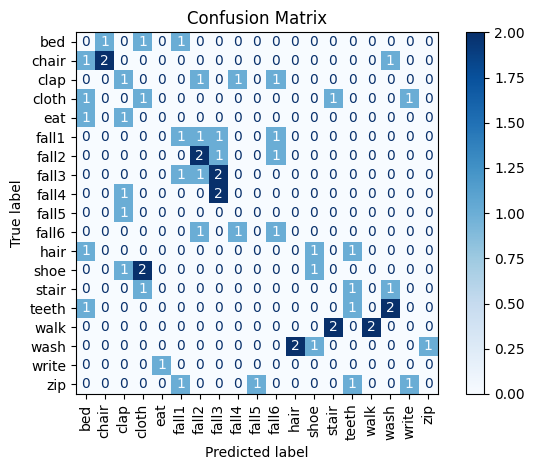

Classification Report:
               precision    recall  f1-score   support

         bed       0.00      0.00      0.00         3
       chair       0.67      0.50      0.57         4
        clap       0.20      0.25      0.22         4
       cloth       0.20      0.25      0.22         4
         eat       0.00      0.00      0.00         2
       fall1       0.25      0.25      0.25         4
       fall2       0.33      0.50      0.40         4
       fall3       0.33      0.50      0.40         4
       fall4       0.00      0.00      0.00         3
       fall5       0.00      0.00      0.00         1
       fall6       0.25      0.33      0.29         3
        hair       0.00      0.00      0.00         3
        shoe       0.33      0.25      0.29         4
       stair       0.00      0.00      0.00         3
       teeth       0.25      0.25      0.25         4
        walk       1.00      0.50      0.67         4
        wash       0.00      0.00      0.00         4
   

{'accuracy': 0.2222222222222222,
 'precision': 0.23835978835978835,
 'recall': 0.2222222222222222,
 'f1': 0.22111363063744016,
 'mcc': 0.1762826190330801,
 'kappa': 0.17548076923076927,
 'hamming_loss_val': 0.7777777777777778,
 'cm': array([[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 

In [4]:
# Evaluation mode
model.eval()

# Lists to store predictions and true labels
all_predictions = []
all_targets = []

# Evaluate on the validation set (assuming you have a separate validation set)
with torch.no_grad():
    for inputs, labels in val_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)  # Get the predicted class indices
        all_predictions.extend(predicted.cpu().numpy())
        all_targets.extend(labels.cpu().numpy())

# Convert lists to numpy arrays
all_predictions = np.array(all_predictions)
all_targets = np.array(all_targets)

# Get model's performance
get_metrics(all_targets, all_predictions, scenario_mapping.values(), print_results=True)